## Ever read a bunch of sentences and wished to reduce it all as themes or categories so as to interpret it and document them easily? Yes, those wishes do have real-life answers to them and that is exactly the topic of this notebook

![](https://github.com/rakash/Scripts/blob/master/bokeh_plot.png?raw=true)

## WHAT IS A TOPIC MODEL?

*****
A type of statistical model for discovering the abstract "topics" that occur in a collection of documents. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.
*****

![](https://theintelligenceofinformation.files.wordpress.com/2016/12/topic-modeling-for-learning-analytics-researchers-lak15-tutorial-15-638.jpg)

### Popular topic modeling algorithms include Latent Semantic Analysis (LSA) a.k.a Latent Semantic Indexing , Hierarchical Dirichlet Process (HDP), Latent Dirichlet Allocation (LDA) and Non-negative Matrix factorization among which LDA has shown great results in practice and therefore widely adopted. We'll look at them all one by one. Lets get to it. 

1. [Latent Semantic Analysis](#lsa)
2. [Latent Dirichlet Allocation](#lda)
3. [Hierarchical Dirichlet Process](#hdp)
4. [Non-negative Matrix factorization](#nmf)

### Importing the important libraries and setting up the important libraries and cleaning datasets before we get into the methods

In [1]:
import os
print(os.listdir("../input"))

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

['uci-news-aggregator.csv']


### Stopwords are words that are commonly used. Using the popular NLTK package in python, lets import the stopwords in the english language
### and save it. It'll be used later for modeling purposes

In [2]:
# NLTK Stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

### The extended stopwords list from the scikit learn library

In [3]:
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']

In [4]:
stop_words.extend(st1)

In [5]:
data = pd.read_csv("../input/uci-news-aggregator.csv")

### Selecting sample rows from all categories(in this case, topics) so computations are quicker. 

In [6]:
bg = data[data.CATEGORY == 'b']
tg = data[data.CATEGORY == 't']
eg = data[data.CATEGORY == 'e']
mg = data[data.CATEGORY == 'm']

In [7]:
bg_rows = np.random.choice(bg.index.values, 750)
bg_data = bg.ix[bg_rows]

tg_rows = np.random.choice(tg.index.values, 750)
tg_data = tg.ix[tg_rows]

eg_rows = np.random.choice(eg.index.values, 750)
eg_data = eg.ix[eg_rows]

mg_rows = np.random.choice(mg.index.values, 750)
mg_data = mg.ix[mg_rows]

In [8]:
data = bg_data.append([tg_data, eg_data, mg_data])

In [9]:
title = data['TITLE']
category = data['CATEGORY']

### Now that we have cleaned and set the variables that will be needed for the algorithms, lets dive into the 1st type, 

<a id='lsa'></a>

# Latent Semantic Analysis

![](https://nlp.stanford.edu/IR-book/html/htmledition/img1822.png)

**Latent Semantic Analysis (LSA) is a mathematical method that tries to bring out latent relationships within a collection of documents on to a lower dimensional space. LSA assumes that words that are close in meaning will occur in similar pieces of text (the distributional hypothesis). A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns.  Rather than looking at each document isolated from the others it looks at all the documents as a whole and the terms within them to identify relationships.**

Singular value decomposition can be used to solve the low-rank matrix approximation problem. We then derive from it an application to approximating term-document matrices. We invoke the following three-step procedure to this end:
***
 * Given $C$, construct its SVD in the form $C=U\Sigma V^T$.
 * Derive from $\Sigma$ the matrix $\Sigma_k$ formed by replacing by zeros the $r-k$ smallest singular values on the diagonal of $\Sigma$.
 * Compute and output $C_k$= $U\Sigma_k V^T$ as the rank-$k$ approximation to $C$.;

Where C is the term-document matrix and $U$, $\Sigma$ and $V^T$ are SVD computed matrices.
***

**Done with theory, on to Python now!  For LSI,  i'll be using scikit learn module**

**Importing modules from scikit learn and countvector-izing them first. ** 

**In Scikit learn, Dimensionality reduction for LSA is done using truncated SVD (aka LSA).**

In [10]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 4

# Converting the document to a matrix of token counts

vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(title)
 
# Build a Latent Semantic Indexing Model using SVD

lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)

(3000, 4)


In [11]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LSI Model:")
print_topics(lsi_model, vectorizer)
print("=" * 20)

LSI Model:
Topic 0:
[('new', 0.9173610008631821), ('samsung', 0.13392268914893665), ('google', 0.13181578815134812), ('apple', 0.12882664315513512), ('study', 0.10161607815446591), ('galaxy', 0.07992881880768013), ('video', 0.07714239765205783), ('says', 0.06300152829575048), ('report', 0.06217539110827279), ('york', 0.061695433176502223)]
Topic 1:
[('samsung', 0.5588628282333338), ('apple', 0.4285850378963545), ('google', 0.4187728017454322), ('galaxy', 0.3653047655346509), ('android', 0.11964624197685832), ('price', 0.10441085623807904), ('iphone', 0.09424117782946409), ('glass', 0.07907721987859506), ('gear', 0.06586869614988115), ('microsoft', 0.06286643196576489)]
Topic 2:
[('ebola', 0.7279194741040831), ('west', 0.33230385328450335), ('outbreak', 0.2534786134478599), ('says', 0.2108644504694435), ('guinea', 0.17438679812280816), ('africa', 0.16519569167667067), ('virus', 0.14644232046338396), ('kim', 0.14641587110883314), ('kardashian', 0.12884153998768186), ('kanye', 0.117304436

### above are the topics by the LSI model. 

In [12]:
from sklearn.manifold import TSNE
# NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

Loading BokehJS ...

### Lets now visualise the LSI model and see the words and documents that are close to each other according to the model

### Documents

In [13]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

svd = TruncatedSVD(n_components=100)
documents_2d = svd.fit_transform(data_vectorized)
 
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(data))
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

Loading BokehJS ...

### The Inference from the plot above is that similar documents are plotted close by in a low dimensional space. Same with words(although not the objective here) shown below, 

### Words

In [14]:
svd = TruncatedSVD(n_components=100)
words_2d = svd.fit_transform(data_vectorized.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

### Zoom in a bit to find some meaningful representations.

### However, LSI has one major weakness – ambiguity.  For example, how could a system determine if you are talking about Microsoft office, or the office in which you work. This is where LDA comes in, lets look at that.

<a id='lda'></a>

# Latent Dirichlet Allocation

### Corpus - Document - Word : Topic Generation

***
**Is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.**
***

 <hr>
           
           LSI examines the words used in a document and looks for their relationships with other words. LSI allows a system to determine the kind of words that a document might be relevant for, even if they are not actually used on the document itself.  But having content that is full of words that have relationships with each other, you are strengthening the document for all of those words.
        
           LDA is a significant extension of LSI.  Words are grouped into topics.  They can exist in more than one topic, in fact most do.  LDA tackles ambiguity by comparing a document to two topics and determining which topic is closer to the document, across all combinations of topics which seem broadly relevant. In doing so, LDA helps to determine which documents are most relevant to which topics.
<hr/>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Latent_Dirichlet_allocation.svg/593px-Latent_Dirichlet_allocation.svg.png)

***
α is the parameter of the Dirichlet prior on the per-document topic distributions,
β is the parameter of the Dirichlet prior on the per-topic word distribution,
$ \theta _{m}$ is the topic distribution for document m,
$\varphi _{k}$ is the word distribution for topic k,
$z_{mn}$ is the topic for the n-th word in document m, and
$w_{mn}$ is the specific word.

***
The fact that W is grayed out means that words $\displaystyle w_{ij}$ are the only observable variables, and the other variables are latent variables. A sparse Dirichlet prior can be used to model the topic-word distribution, following the intuition that the probability distribution over words in a topic is skewed, so that only a small set of words have high probability. The resulting model is the most widely applied variant of LDA today. The plate notation for this model is shown below, where $\displaystyle K$  denotes the number of topics and $\displaystyle \varphi _{1},\dots ,\varphi _{K}$ are $\displaystyle V$-dimensional vectors storing the parameters of the Dirichlet-distributed topic-word distributions ( $\displaystyle V$ is the number of words in the vocabulary).

It is helpful to think of the entities represented by $\displaystyle \theta$ and $\displaystyle \varphi$ as matrices created by decomposing the original document-word matrix that represents the corpus of documents being modeled. In this view, $\displaystyle \theta$  consists of rows defined by documents and columns defined by topics, while $\displaystyle \varphi$ consists of rows defined by topics and columns defined by words. Thus, $\displaystyle \varphi _{1},\dots ,\varphi _{K}$ refers to a set of rows, or vectors, each of which is a distribution over words, and $\displaystyle \theta _{1},\dots ,\theta _{M}$ refers to a set of rows, each of which is a distribution over topics.

***

![](https://upload.wikimedia.org/wikipedia/commons/4/4d/Smoothed_LDA.png)

**LDA assumes that each document in a corpus contains a mix of topics that are found throughout the entire corpus. The topic structure is hidden - we can only observe the documents and words, not the topics themselves. Because the structure is hidden (also known as latent), this method seeks to infer the topic structure given the known words and documents.**

### LDA Document Structure

### LDA represents documents as mixtures of topics that spit out words with certain probabilities. It assumes that documents are produced in the following fashion: when writing each document, you

***
* Decide on the number of words N the document will have.
* Choose a topic mixture for the document (according to a Dirichlet probability distribution over a fixed set of K topics). 
* Generate each word in the document by:
    *  First picking a topic.
    * Then using the topic to generate the word itself (according to the topic’s multinomial distribution).
    * Assuming this generative model for a collection of documents, LDA then tries to backtrack from the documents to find a set of topics that are likely to have generated the collection.
***

### Now that we saw the theory aspects and the maths behind, lets see how to do it in python,

### Convert to list so we can do some pre-processing

In [15]:
# Convert to list
df = data.TITLE.values.tolist()

df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

# Remove new line characters
df = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df = [re.sub("\'", "", sent) for sent in df]

pprint(df[:1])

['Burger King to buy Tim Hortons to move to Canada, avoid U.S. taxes']


In [16]:
df = [re.sub("-", " ", sent) for sent in df]
df = [re.sub(":", "", sent) for sent in df]

### All punctuations need to be removed, so lets write a function for that and we'll use the gensim package for that. deacc=TRUE does that. 

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df))

### N-gram models

### Creating Bigram and Trigram Models

### What are they? 

### Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring. Gensim's Phrases method helps us with that. 

In [18]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/opt/conda/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### We need to apply the bigrams, trigrams and lemmatize the set of documents we are working with.

###  mm lemmatize ? ok  It is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

### To do that, lets create few functions. 

In [19]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

### Applying the custom functions to our dataset

In [20]:
# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

### As we saw in the definition above, converting our document set into a document-term matrix.

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

### Readable format of corpus (term-frequency)

In [22]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[11:12]]

[[('maker', 1), ('allergan', 1), ('bid', 1), ('botox', 1)]]

### Building the LDA model

In [23]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### Now that the model is built, lets print the Keyword in the 10 topics

In [24]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"study" + 0.022*"virus" + 0.015*"new" + 0.014*"day" + 0.014*"link" + '
  '0.013*"increase" + 0.011*"find" + 0.010*"deadly" + 0.010*"life" + '
  '0.010*"tv"'),
 (1,
  '0.019*"mer" + 0.018*"hospital" + 0.016*"test" + 0.012*"patient" + '
  '0.011*"blood" + 0.011*"rise" + 0.010*"kill" + 0.010*"world" + 0.009*"watch" '
  '+ 0.007*"review"'),
 (2,
  '0.018*"death" + 0.015*"risk" + 0.015*"help" + 0.013*"spread" + '
  '0.013*"woman" + 0.012*"ebola_outbreak" + 0.012*"man" + 0.012*"guinea" + '
  '0.011*"fda" + 0.011*"cigarette"'),
 (3,
  '0.022*"case" + 0.022*"new" + 0.018*"report" + 0.014*"drug" + '
  '0.013*"disease" + 0.013*"year" + 0.011*"high" + 0.008*"obesity" + '
  '0.008*"fight" + 0.007*"alzheimer"'),
 (4,
  '0.026*"say" + 0.024*"health" + 0.017*"cancer" + 0.014*"heart" + '
  '0.012*"recall" + 0.010*"people" + 0.009*"doctor" + 0.008*"scientist" + '
  '0.008*"reveal" + 0.007*"good"')]


### Right, now that the LDA model is built, there has to be a metric to evaluate how good the model is. Lets compute that to check how good it is. 


### There are 2 such metrics. 

### 1)   Perplexity -  Is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of k, you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents. - Lower the better.
### 2)  Coherence Score - Is defined as the average / median of the pairwise word-similarity scores of the words in the topic - Higher the better.
                          
                         

In [25]:
# Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.269001054610737

Coherence Score:  0.6864806552606242


> ** From the model we created, lets look at the most salient terms under each topic that contributes to it the most** 

In [26]:
# Visualize the topics

#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#vis

### Note: The graph below is not interactive as the interactive version is causing display issues after the notebook is committed. To play around, fork the notebook and check.

![](https://github.com/rakash/Scripts/blob/master/pyldavis.png?raw=true)

**Let’s interpret the topic visualization. Notice how topics are shown on the left while words are on the right. Here are the main things you should consider:**

**Larger topics are more frequent in the corpus**
**Topics closer together are more similar, topics further apart are less similar.**
**When you select a topic, you can see the most representative words for the selected topic. This measure can be a combination of how frequent or how discriminant the word is.**
**You can adjust the weight of each property using the slider.**
**Hovering over a word will adjust the topic sizes according to how representative the word is for the topic.**

### Now that we saw the coherence value for 5 topics, lets create a function to get the coherence values for the count of topics < 5

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=6, step=1)

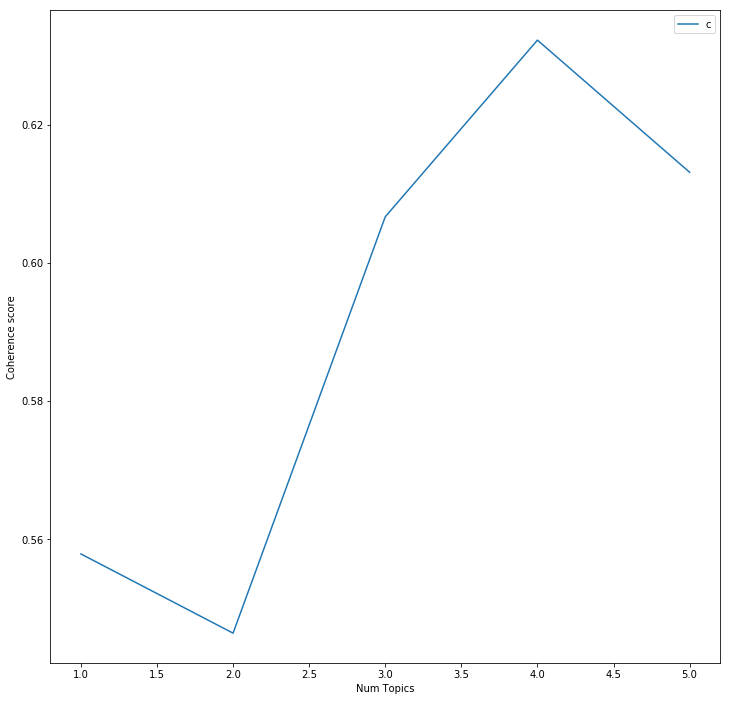

In [29]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.5579
Num Topics = 2  has Coherence Value of 0.5464
Num Topics = 3  has Coherence Value of 0.6067
Num Topics = 4  has Coherence Value of 0.6323
Num Topics = 5  has Coherence Value of 0.6131


In [31]:
# Select the model and print the topics

optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.013*"new" + 0.009*"drug" + 0.009*"hospital" + 0.007*"report" + '
  '0.007*"patient" + 0.006*"say" + 0.005*"death" + 0.005*"health" + '
  '0.005*"link" + 0.004*"healthy"'),
 (1,
  '0.007*"help" + 0.007*"man" + 0.006*"study" + 0.005*"doctor" + 0.005*"death" '
  '+ 0.005*"people" + 0.004*"deadly" + 0.004*"apple" + 0.004*"girl" + '
  '0.004*"research"'),
 (2,
  '0.009*"new" + 0.007*"cigarette" + 0.007*"risk" + 0.007*"say" + 0.006*"case" '
  '+ 0.006*"increase" + 0.005*"health" + 0.005*"blood" + 0.005*"die" + '
  '0.004*"fight"'),
 (3,
  '0.010*"virus" + 0.009*"heart" + 0.007*"woman" + 0.007*"say" + '
  '0.006*"recall" + 0.006*"study" + 0.006*"case" + 0.005*"cancer" + '
  '0.005*"test" + 0.004*"rise"')]


### Now which one do we go for? For this example, I am gonna go with 4 topics because the target lables in this dataset was classified into 4. Otherwise, its better to go with the one having the highest coherence score.

### The purpose of LDA is also to compute how much of the document was generated by which topic. Lets look at that.

In [32]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

   
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9155,"help, man, study, doctor, death, people, deadl...",Burger King to buy Tim Hortons to move to Cana...
1,1,3.0,0.8427,"virus, heart, woman, say, recall, study, case,...",UK house prices rise by 1.9% in February
2,2,0.0,0.6130,"new, drug, hospital, report, patient, say, dea...",Market Close Report NASDAQ Composite index clo...
3,3,1.0,0.8682,"help, man, study, doctor, death, people, deadl...",Candy Crush maker raises $500m in IPO
4,4,1.0,0.8741,"help, man, study, doctor, death, people, deadl...",Amazon acquires digital comics hub ComiXology


### We see above, the dominant topic and percentage contribution for each document. 

<a id='hdp'></a>

# Hierarchical Dirichlet Process

***
is a nonparametric Bayesian approach to clustering grouped data. It uses a Dirichlet process for each group of data, with the Dirichlet processes for all groups sharing a base distribution which is itself drawn from a Dirichlet process
***

###  This technique is not really suitable to a dataset or a problem where the number of topics is predetermined & thats where the difference lies between HDP and LDA

HDP is an extension of LDA, designed to address the case where the number of mixture components (the number of "topics" in document-modeling terms) is not known apriori. 

Using LDA for document modeling, one treats each "topic" as a distribution of words in some known vocabulary. For each document a mixture of topics is drawn from a Dirichlet distribution, and then each word in the document is an independent draw from that mixture (that is, selecting a topic and then using it to generate a word).

For HDP (applied to document modeling), one also uses a Dirichlet process to capture the uncertainty in the number of topics. So a common base distribution is selected which represents the countably-infinite set of possible topics for the corpus, and then the finite distribution of topics for each document is sampled from this base distribution.

### We will be using the hdpmodel module from gensim

In [33]:
from gensim.models import CoherenceModel, HdpModel

In [34]:
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)

In [35]:
hdptopics = hdpmodel.show_topics(formatted=False)

In [36]:
hdptopics[0]

(0,
 [('announced', 0.0015505132578039682),
  ('nutrient', 0.0015298477638611215),
  ('celebs', 0.001200847903540831),
  ('twtr', 0.0011975065275918605),
  ('hepatitis', 0.0011939442064696777),
  ('jimmy', 0.0011931181089835608),
  ('michael', 0.0011333296787678234),
  ('website', 0.0011260720065750472),
  ('relationship', 0.0011171221540322643),
  ('session', 0.0011102913517835062),
  ('reputation', 0.0010976868824788073),
  ('hall', 0.001094761104690699),
  ('rd', 0.001087289110157766),
  ('emerge', 0.0010849580101154914),
  ('transfer', 0.0010720099343745862),
  ('fail', 0.001071339876858204),
  ('inappropriate', 0.0010647696925120142),
  ('iwata', 0.0010553533828703853),
  ('bipartisan', 0.0010343837834766625),
  ('investigator', 0.0010269352887633924)])

In [37]:
len(hdptopics)

20

### The topics generated by HDP are as above. Lets look at the terms of the 1st topic.  We also see that the model has generated 20 topics. We'll be comparing the coherence scores of the other models later, But before that, lets look at the next technique under topic modeling. 

<a id='nmf'></a>

# Non-Negative Matrix Factorization

![](https://upload.wikimedia.org/wikipedia/commons/f/f9/NMF.png)

Is a group of algorithms where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect.

$\mathbf {V}$= $\mathbf {W} \mathbf {H}$
Matrix multiplication can be implemented as computing the column vectors of V as linear combinations of the column vectors in W using coefficients supplied by columns of H. 

That is, each column of V can be computed as follows:

$\mathbf {v} _{i}$= $\mathbf {W} \mathbf {h} _{i}$
where $\mathbf {v} _{i}$ is the i-th column vector of the product matrix $\mathbf {V}$ and $\mathbf {h} _{i}$ is the i-th column vector of the matrix $\mathbf {H}$.

Again, difference between LDA and NMF? 

Latent Dirichlet Allocation (where documents are represented by latent topics, and topics are represented by a distribution over words) 
Non-negative Matrix Factorization (where a document-term matrix is approximately factorized into term-feature and feature-document matrices).

### NMF Structure

***
Thus, given a set of multivariate $\displaystyle n$ -dimensional data vectors, they are put into an $\displaystyle n*m$ matrix $\displaystyle V$ as its columns, where $\displaystyle m$ is the number of examples in the data set. This matrix $\displaystyle V$ is approximately factorized into an $\displaystyle n*t$ matrix $\displaystyle W$ and an $\displaystyle t*m$ matrix $\displaystyle H$, where $\displaystyle t$ is generally less than $\displaystyle n$ or $\displaystyle m$. Hence, this results in a compression of the original data matrix.

In terms of topic modeling, the input document-term matrix $\displaystyle V$ is factorized into a $\displaystyle n*t$ document-topic matrix and a $\displaystyle t*m$  topic-term matrix, where $\displaystyle t$ is the number of topics produced.
***

### On to python now,

### Forming the matrix, getting the features and normalizing them

In [38]:
from nltk.corpus import stopwords;
import nltk;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

vectorizer = CountVectorizer(analyzer='word', max_features=5000, stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}');
x_counts = vectorizer.fit_transform(title);
print( "Created %d X %d document-term matrix" % (x_counts.shape[0], x_counts.shape[1]) )
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

Created 3000 X 5000 document-term matrix


In [39]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 5000 distinct terms


In [40]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
model = NMF(n_components=5, init='nndsvd');
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=5, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

### In order to get the topics, we'll again be creating a function. The NMF doesn't have the show topics method and hence we'll be taking the custom approach.

In [41]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [42]:
num_topics = 5
nmf_df = get_nmf_topics(model, 5)
nmf_df

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,ebola,samsung,facebook,new,google
1,outbreak,galaxy,twitter,study,android
2,guinea,review,buy,says,apple
3,west,guardians,button,phone,glass
4,africa,apple,users,amazon,need
5,control,price,news,report,know
6,cases,movie,experiment,microsoft,chrome
7,virus,proves,oculus,million,things
8,kills,gear,modi,recalls,app
9,toll,iphone,feeds,heart,development


### The table above shows the terms under each topic, as per the NMF model

In [43]:
raw_documents = title.str.strip()
raw_documents= raw_documents.str.lower()
raw_documents = raw_documents.tolist()
raw_doc1 = [i.split() for i in raw_documents]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = stop_words, min_df = 20) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 3000 X 93 document-term matrix


In [45]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 93 distinct terms


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words= stop_words, min_df = 20) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 3000 X 93 TF-IDF-normalized document-term matrix


### Until now, we created the term matrix. lets rank the terms and build the model.

In [47]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [48]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. new (111.37)
02. google (59.06)
03. says (57.18)
04. apple (56.66)
05. ebola (52.80)
06. 2014 (45.91)
07. study (43.82)
08. microsoft (43.42)
09. samsung (39.64)
10. report (38.00)
11. video (37.09)
12. health (36.30)
13. million (36.06)
14. day (33.72)
15. facebook (33.50)
16. cancer (32.95)
17. sales (30.94)
18. china (30.28)
19. watch (30.01)
20. twitter (28.90)


In [49]:
k = 10
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

### checking the index for a term

In [50]:
term_index = terms.index('samsung')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 1.99, 0.  , 0.  ])

### Sorting the indexes we got using the model to plot and see the top terms.

In [51]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [52]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: new, report, tv, high, game, trailer, home, season, android, gm
Topic 02: google, android, day, app, tv, facebook, time, deal, help, health
Topic 03: says, report, million, climate, people, day, fda, update, mers, life
Topic 04: ebola, outbreak, west, virus, health, cases, death, help, kim, kardashian
Topic 05: apple, iphone, billion, update, samsung, data, sales, amazon, tv, world
Topic 06: 2014, million, sales, gm, world, day, release, life, hospital, year
Topic 07: microsoft, office, china, report, data, gm, death, week, tech, global
Topic 08: samsung, galaxy, s5, price, android, report, review, day, watch, update
Topic 09: study, finds, cancer, heart, health, risk, death, disease, shows, facebook
Topic 10: video, watch, facebook, game, twitter, bieber, season, movie, review, year


In [53]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [54]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

### The top 15 terms in the 2nd topic

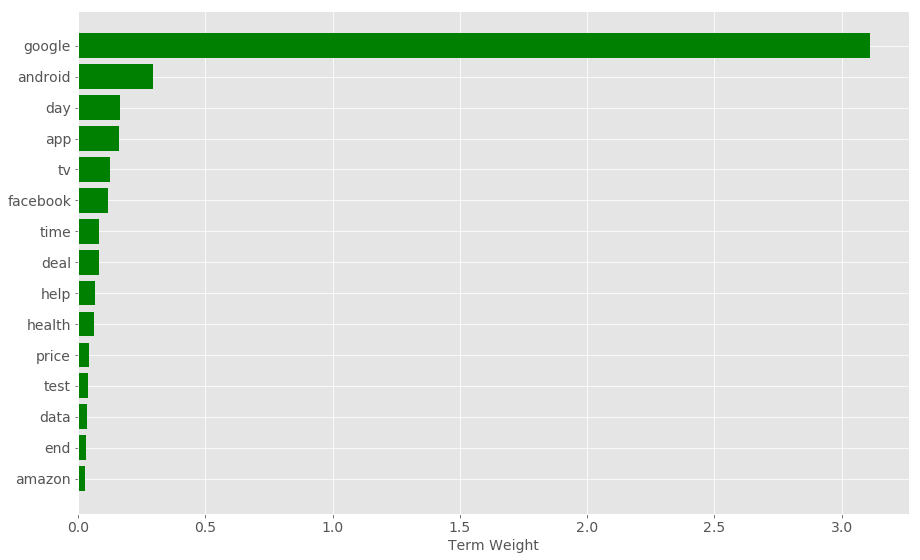

In [55]:
plot_top_term_weights( terms, H, 1, 15 )

### Create the Topic Models
### A common approach for parameter selection is to Measure and compare the topic coherence of models generated for different values of k.
### We need to start by pre-specifying an initial range of "sensible" values

In [56]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [57]:
kmin, kmax = 2, 8

### Apply NMF for each of these values:

In [58]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...


### we need to define a class that will generate documents in a form that can be consumed by Gensim's Word2Vec implementation

In [59]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

### Now build a Skipgram Word2Vec model from all documents in the input file using Gensim

In [60]:
import gensim
docgen = TokenGenerator(raw_documents, stop_words )
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


### Selecting the Number of Topics

### Once we have our Word2vec model, we can use it as part of our topic coherence approach to evaluate the different NMF topic models that we created previously. To do this, we will implement a simple version of the TC-W2V coherence measure.

### We use the Word2vec model to calculate coherence scores for each of these models. We will define this coherence score as follows, 

In [61]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

### We also define a function to get the topic descriptor (i.e. list of top terms) for each topic

In [62]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

### process each of the models for different values of k

In [63]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=02: Coherence=0.9998
K=03: Coherence=0.9997
K=04: Coherence=0.9997
K=05: Coherence=0.9997
K=06: Coherence=0.9997
K=07: Coherence=0.9997
K=08: Coherence=0.9997


/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Surprisingly, for this text document, the coherence is all the same for k = 2 to k = 8. Lets plot that & see and note this value and we'll compare it with other techniques.

In [64]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

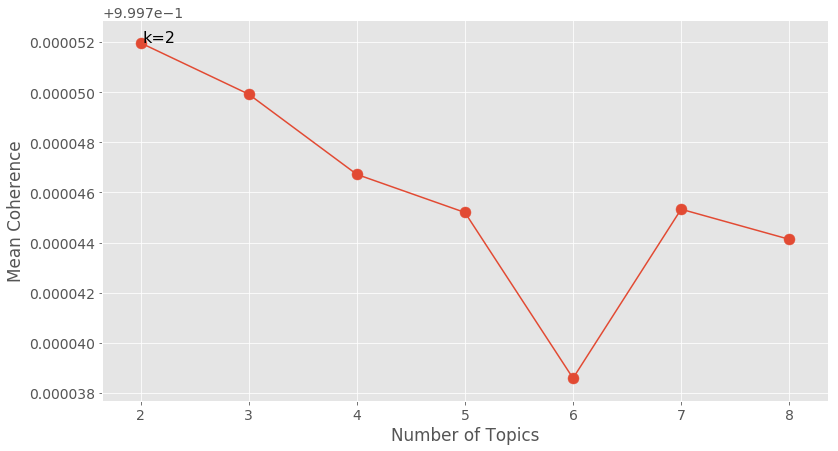

In [65]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [66]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [67]:
for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: new, study, video, report, game, watch, tv, high, ebola, trailer
Topic 02: google, apple, samsung, says, microsoft, 2014, android, iphone, galaxy, day


### The words under each topic can be seen above and as per the best K value chosen by NMF. We also saw the coherence value of the NMF model. We will compare those results with LDA, LSI and HDP.

# Comparing the techniques

In [68]:
lsimodel = LsiModel(corpus=corpus, num_topics=5, id2word=id2word)
lsitopics = lsimodel.show_topics(formatted=False)

In [69]:
ldatopics = lda_model.show_topics(formatted=False)

In [70]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsitopics]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdptopics]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

In [71]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

In [72]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.figure(figsize=(12,12))
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

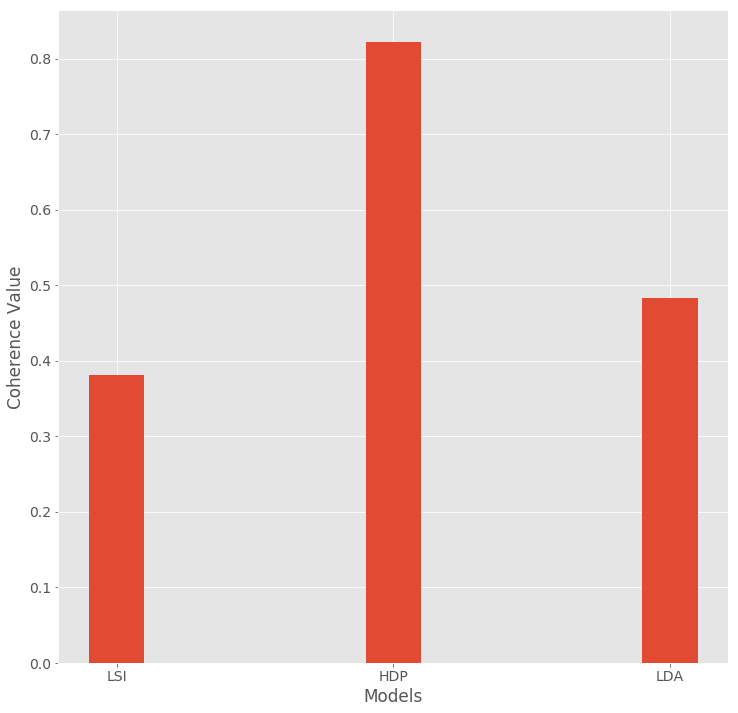

In [73]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

### The NMF model has the highest coherence score(not in the plot above -- NMF = .9).

## Conclusion

### The idea of this notebook was to implement the widely used topic modeling techniques and compare. Although NMF gave the highest coherence score, LDA is the most used technique and considered to be consistent as it is likely to provide more "coherent" topics. NMF performs better where the topic probabilities should remain fixed per document. HDP on the other hand is less preferred since the number of topics is not determined in prior and hence used rarely. 

### Of course, it depends on the dataset but to check for your own set of documents, fork the notebook and play around. Share your thoughts & upvote if you found the kernel useful.